# Creating RDM-comparison scatter-plots

This demo shows you how to plot two or more RDMs against each other as scatter-plots.

In [1]:
# First some standard imports:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from rsatoolbox.rdm import concat, RDMs
from rsatoolbox.vis import rdm_comparison_scatterplot

Now we can load the 92 image data and turn them into two sets of RDMs:

In [2]:
condition_descriptors = {
    'type': (["A"] * 23) + (["B"] * 23) + (["C"] * 46)
}

matlab_data = loadmat(
    '92imageData/92_brainRDMs.mat')['RDMs']
n_rdms = len(matlab_data[0])
rdms_ = RDMs(np.array([matlab_data[0][i][0][0] for i in range(n_rdms)]),
             pattern_descriptors=condition_descriptors,
             rdm_descriptors={'name': np.array([f"RDM{i}"
                                                for i in range(4)])}
             )

rdms_a = concat([rdms_[0], rdms_[1]])
rdms_b = concat([rdms_[2], rdms_[3]])


Now we can use the function `rdm_comparison_scatterplot` to plot the scatterplot. In its simplest form simply pass two RDMs objects or a single RDMs object as input. A single RDMs object will trigger a plot of each of its content RDMs against each other. Two RDMs objects will trigger a plot of each RDM in the first against each RDM in the second object.

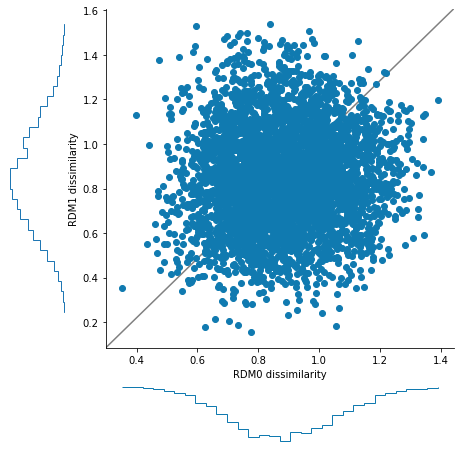

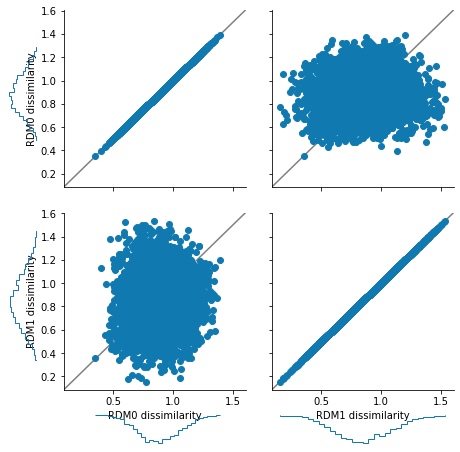

In [3]:
rdm_comparison_scatterplot((rdms_[0], rdms_[1]))
plt.show()

rdm_comparison_scatterplot(rdms_a)
plt.show()

The function comes with quite a few options to change the appearance.
In particular you can choose categories of stimuli to highlight in a chosen color. To do so, choose `highlight_selector` and `highlight_categories` to choose the selector and categories to highlight. Using the `color` dictionary you can then choose the colors for the highlighted categories.

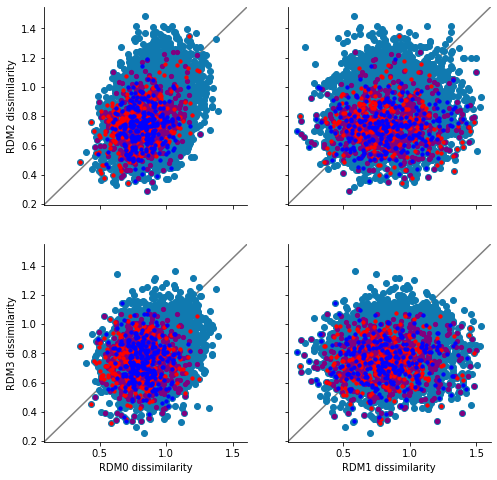

In [4]:
rdm_comparison_scatterplot((rdms_a, rdms_b),
                           show_marginal_distributions=False,
                           show_identity_line=True,
                           show_legend=False,
                           highlight_selector='type',
                           highlight_categories=["A","B"],
                           colors={
                               "A": (1, 0, 0),
                               "B": (0, 0, 1)
                           }
                           )

plt.show()

Finally, the function returns the figure it plotted as a matplotlib object which allows you to perform any futher adjustments you might want to make. Here, just a title is added, but anything is possible.

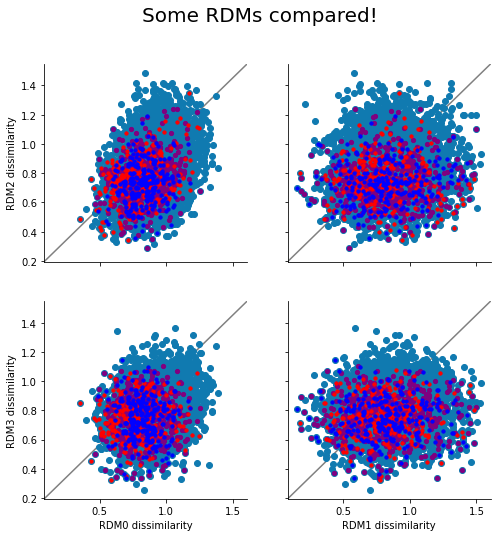

In [5]:
fig1 = rdm_comparison_scatterplot((rdms_a, rdms_b),
                           show_marginal_distributions=False,
                           show_identity_line=True,
                           show_legend=False,
                           highlight_selector='type',
                           highlight_categories=["A","B"],
                           colors={
                               "A": (1, 0, 0),
                               "B": (0, 0, 1)
                           }
                           )
fig1.suptitle('Some RDMs compared!', fontsize=20)
plt.show()